# Wizualizacja danych
## 3a

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
tests_time = pd.read_pickle("3a.pkl")

tests_time[['algorithm', 'data']] = tests_time.Name.apply(lambda cell: pd.Series(str(cell).split("|")))
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,data
0,AdaBoost | 10.0% of data,0.749000,0.751889,8.669233,0.760712,0.749163,0.860646,0.619367,AdaBoost,10.0% of data
0,AdaBoost | 50.0% of data,0.742371,0.743587,8.898176,0.747366,0.742739,0.857054,0.615169,AdaBoost,50.0% of data
0,AdaBoost | 100.0% of data,0.721543,0.720520,9.617569,0.722992,0.721553,0.845308,0.586956,AdaBoost,100.0% of data
0,MLP | 10.0% of data,0.837286,0.834244,5.619952,0.841715,0.838094,0.910006,0.732207,MLP,10.0% of data
0,MLP | 50.0% of data,0.874686,0.873188,4.328202,0.876692,0.875419,0.930747,0.787478,MLP,50.0% of data
0,MLP | 100.0% of data,0.883429,0.881977,4.026235,0.886163,0.883997,0.935520,0.802150,MLP,100.0% of data
0,CNN | 10.0% of data,0.867143,0.862843,4.588723,0.868083,0.864648,0.924962,0.773621,CNN,10.0% of data
0,CNN | 50.0% of data,0.923371,0.923179,2.646657,0.924378,0.923170,0.957329,0.864555,CNN,50.0% of data
0,CNN | 100.0% of data,0.941800,0.941464,2.010157,0.942539,0.941428,0.967485,0.895273,CNN,100.0% of data


In [15]:
def draw_plot(df, score):
    ADA_df = df[:3]
    MLP_df = df[3:6]
    CNN_df = df[6:]
    
    plt.title(score)
    plt.plot(MLP_df['data'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['data'], CNN_df[score], label='CNN')
    plt.plot(ADA_df['data'], ADA_df[score], label='ADA')
    plt.legend()

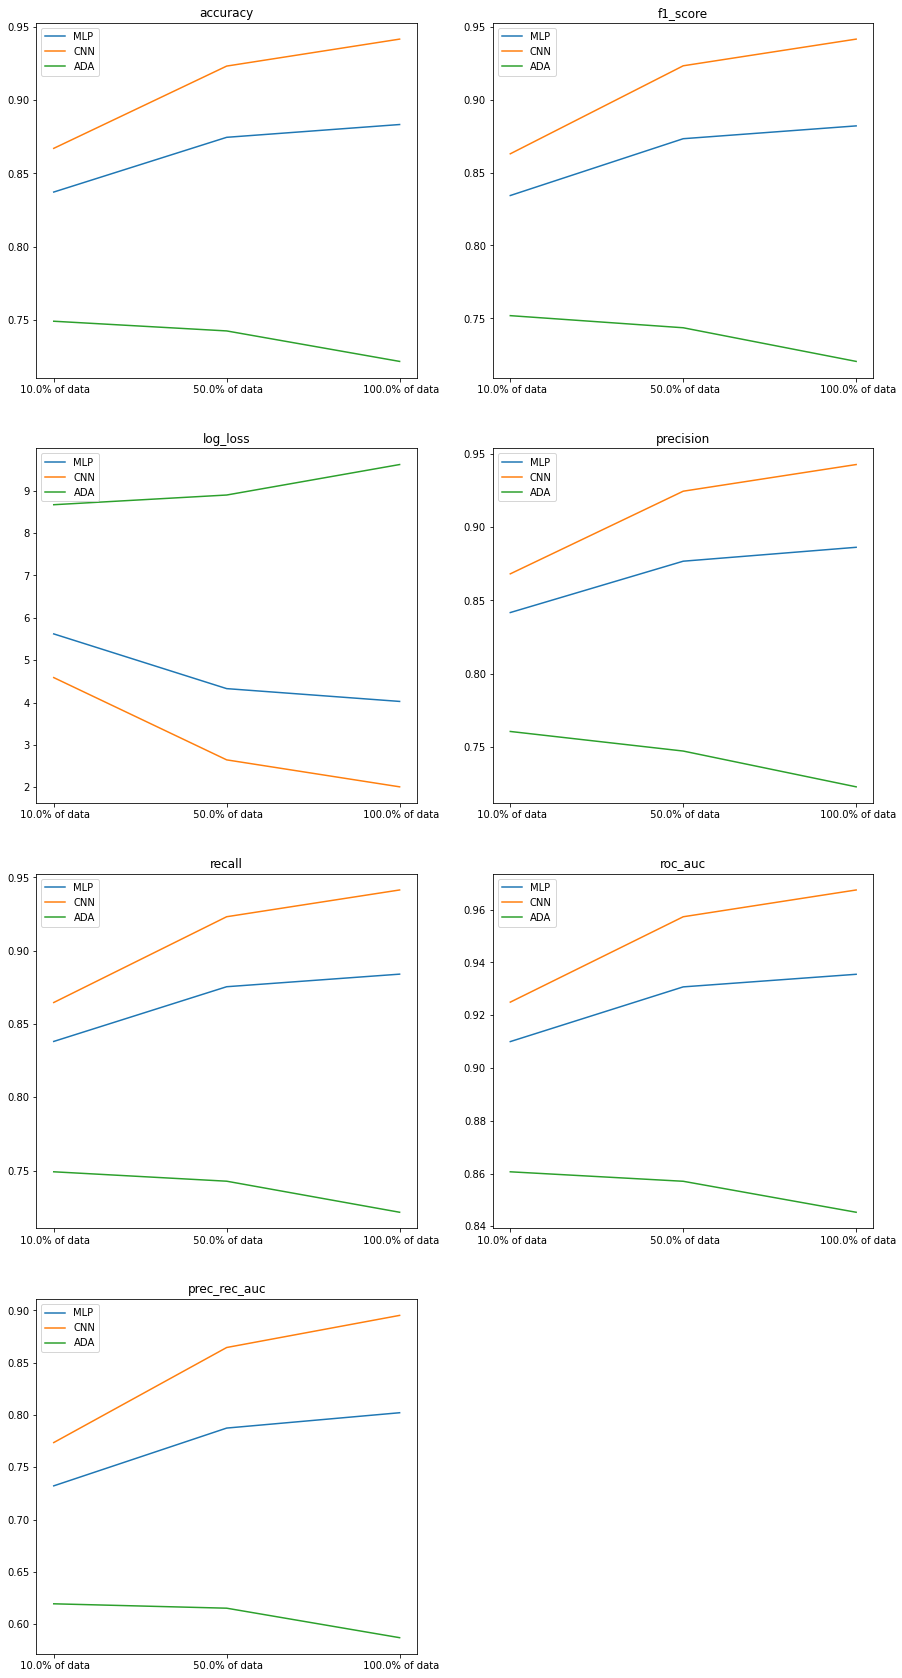

In [18]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('3a_plot.png')

## 3b

In [19]:
tests_time = pd.read_pickle("3b.pkl")

tests_time[['algorithm', 'data', 'time']] = tests_time.Name.apply(lambda cell: pd.Series(str(cell).split("|")))
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,data,time
0,AdaBoost | 50.0% of data | 212 secs,0.688314,0.688106,10.765243,0.697314,0.688081,0.826725,0.550447,AdaBoost,50.0% of data,212 secs
0,AdaBoost | 50.0% of data | 627 secs,0.753543,0.752674,8.512328,0.755930,0.753249,0.862933,0.628641,AdaBoost,50.0% of data,627 secs
0,AdaBoost | 50.0% of data | 1785 secs,0.789543,0.789982,7.268932,0.792207,0.790228,0.883419,0.672362,AdaBoost,50.0% of data,1785 secs
0,MLP | 50.0% of data| 5 epochs,0.858800,0.858106,4.876875,0.863362,0.858452,0.921385,0.764586,MLP,50.0% of data,5 epochs
0,MLP | 50.0% of data| 15 epochs,0.882400,0.880851,4.061760,0.882991,0.881708,0.934326,0.798184,MLP,50.0% of data,15 epochs
0,MLP | 50.0% of data| 25 epochs,0.885657,0.884865,3.949262,0.887206,0.885287,0.936292,0.804582,MLP,50.0% of data,25 epochs
0,CNN | 50.0% of data| 5 epochs,0.896600,0.896143,3.571309,0.899990,0.896879,0.942695,0.823182,CNN,50.0% of data,5 epochs
0,CNN | 50.0% of data| 15 epochs,0.928200,0.928281,2.479884,0.930066,0.928377,0.960202,0.873302,CNN,50.0% of data,15 epochs
0,CNN | 50.0% of data| 25 epochs,0.943486,0.943669,1.951934,0.944031,0.943767,0.968742,0.898537,CNN,50.0% of data,25 epochs


In [20]:
def draw_MLP_CNN_plot(df, score):
    MLP_df = df[3:6]
    CNN_df = df[6:]

    plt.title(score)
    plt.plot(MLP_df['time'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['time'], CNN_df[score], label='CNN')
    plt.legend()
    
def draw_ADA_plot(df, score):
    ADA_df = df[:3]
    
    plt.title(score)
    plt.plot(ADA_df['time'], ADA_df[score], label='ADA')
    plt.legend()
    

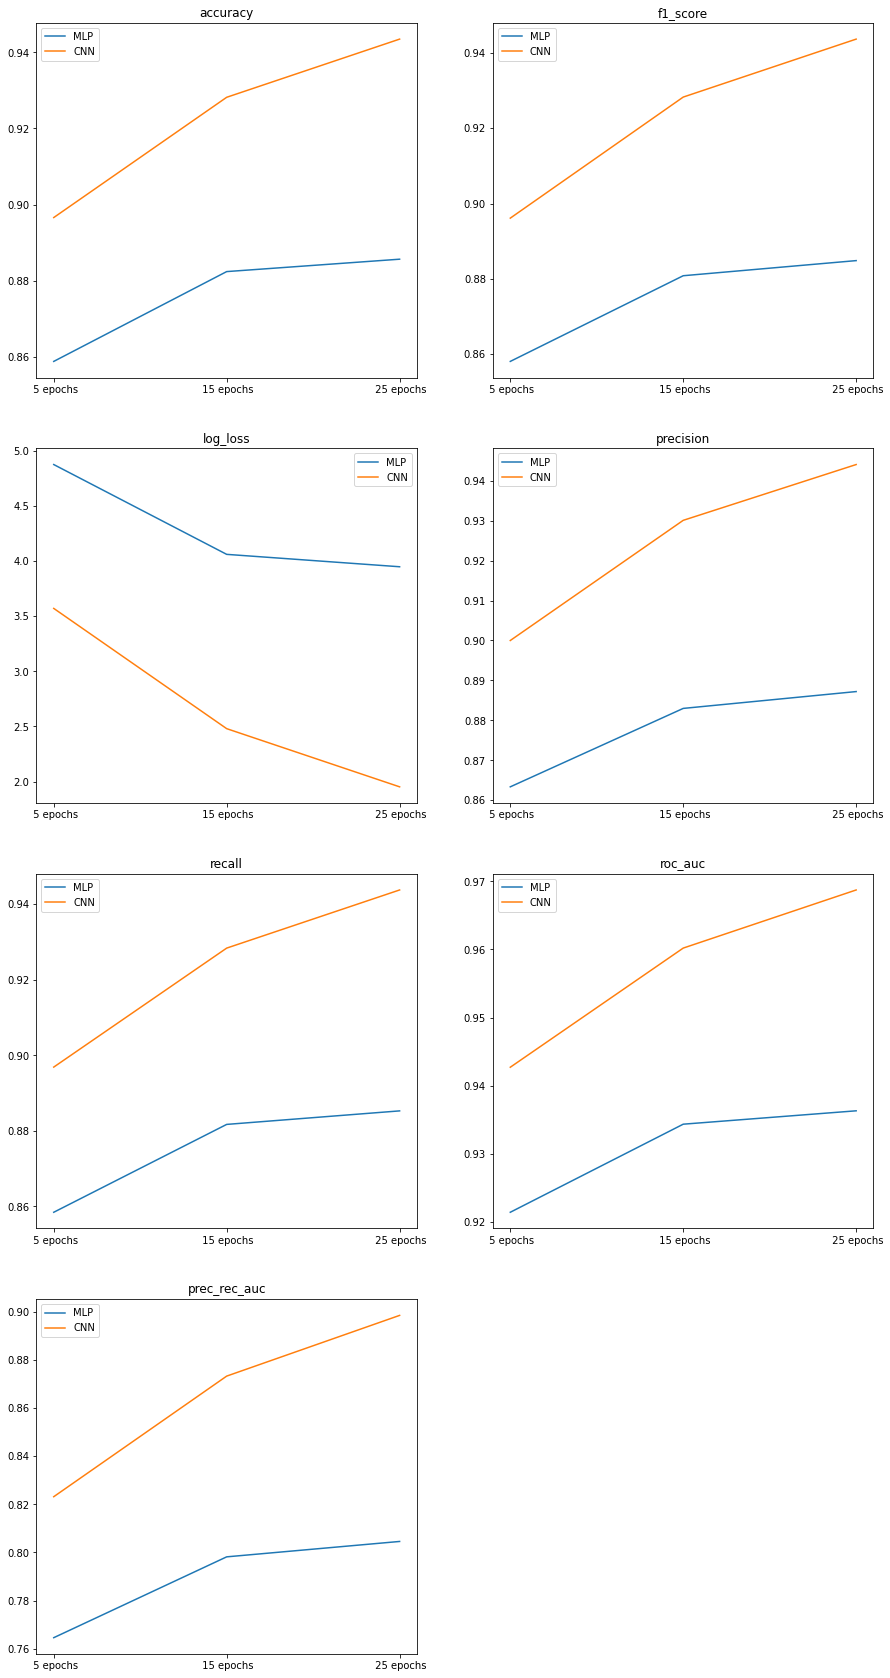

In [21]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_MLP_CNN_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('3b_plot.png')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

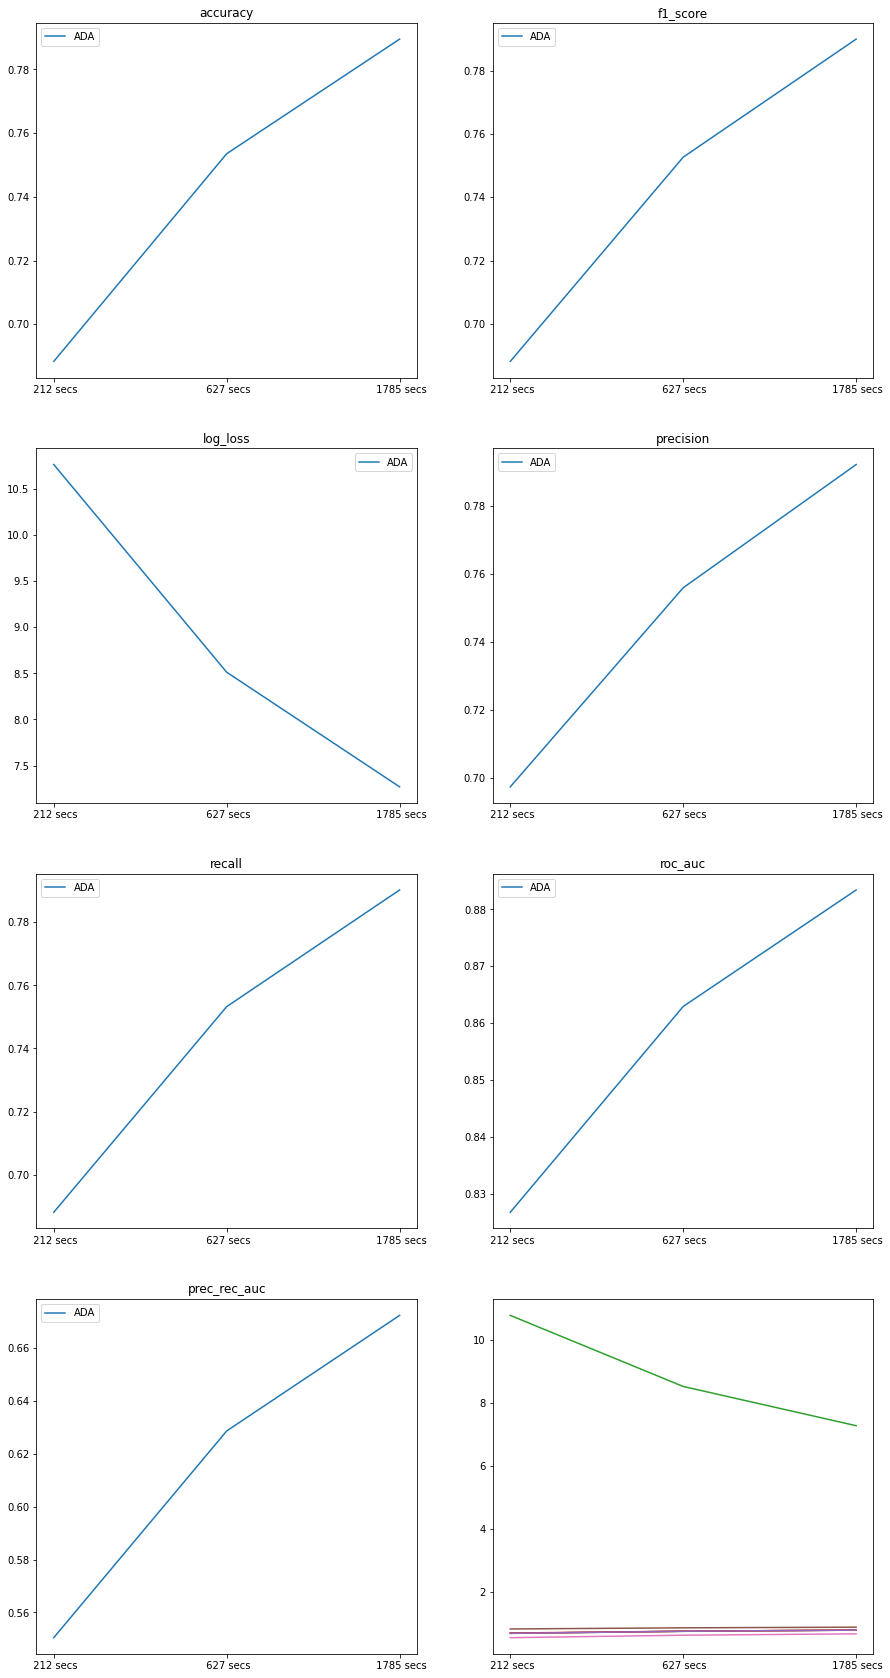

In [22]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_ADA_plot(tests_time, score)
    counter = counter + 1

for score in tests_time.columns[1:8]:
    plt.subplot(nrows, ncols, 8)
    plt.plot(tests_time[:3]['time'], tests_time[:3][score], label='ADA')
    
plt.savefig('3b_ada_plot.png')

# 4

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

tests_time = pd.read_pickle("4.pkl")

mangling_0 = pd.read_pickle("3a.pkl")

tests_time = pd.concat([tests_time, mangling_0])

def name_split(cell):
    splitted_by_line = [x.strip() for x in str(cell).split("|")]
    only_values = pd.Series([x.split(" ")[0] for x in splitted_by_line])
    return only_values

tests_time[['algorithm', 'data', 'mangling']] = tests_time.Name.apply(name_split)
tests_time = tests_time[tests_time['data'] == '50.0%']
tests_time = tests_time.fillna('0.0%')
tests_time['mangling'] = tests_time['mangling'].apply(lambda x: float(x.strip('%'))/100)
tests_time

,Name,accuracy,f1_score,log_loss,precision,recall,roc_auc,prec_rec_auc,algorithm,data,mangling
0,AdaBoost | 50.0% of data | 1.0% mangling,0.730743,0.736118,9.299812,0.746584,0.731905,0.850987,0.600884,AdaBoost,50.0%,0.01
0,AdaBoost | 50.0% of data | 5.0% mangling,0.718343,0.724324,9.728093,0.738498,0.718751,0.843729,0.581152,AdaBoost,50.0%,0.05
0,AdaBoost | 50.0% of data | 15.0% mangling,0.671886,0.674869,11.332666,0.684017,0.670356,0.816965,0.512118,AdaBoost,50.0%,0.15
0,AdaBoost | 50.0% of data | 30.0% mangling,0.639057,0.639461,12.466525,0.643230,0.637984,0.798946,0.461308,AdaBoost,50.0%,0.30
0,MLP | 50.0% of data | 1.0% mangling,0.740486,0.725875,8.963306,0.742222,0.740946,0.856061,0.602340,MLP,50.0%,0.01
0,MLP | 50.0% of data | 5.0% mangling,0.671771,0.652288,11.336613,0.715568,0.671952,0.817741,0.536828,MLP,50.0%,0.05
0,MLP | 50.0% of data | 15.0% mangling,0.771686,0.754014,7.885696,0.781151,0.771444,0.873045,0.646986,MLP,50.0%,0.15
0,MLP | 50.0% of data | 30.0% mangling,0.796657,0.782076,7.023213,0.796691,0.795308,0.886360,0.677405,MLP,50.0%,0.30
0,CNN | 50.0% of data | 1.0% mangling,0.843114,0.838424,5.418641,0.843457,0.842359,0.912466,0.737045,CNN,50.0%,0.01
0,CNN | 50.0% of data | 5.0% mangling,0.814286,0.809099,6.414344,0.823226,0.815660,0.897520,0.701925,CNN,50.0%,0.05


In [107]:
def draw_plot(df, score):
    ADA_df = df[df['algorithm'] == 'AdaBoost'].sort_values('mangling')
    MLP_df = df[df['algorithm'] == 'MLP'].sort_values('mangling')
    CNN_df = df[df['algorithm'] == 'CNN'].sort_values('mangling')
    
    plt.title(score)
    plt.plot(MLP_df['mangling'], MLP_df[score], label='MLP')
    plt.plot(CNN_df['mangling'], CNN_df[score], label='CNN')
    plt.plot(ADA_df['mangling'], ADA_df[score], label='ADA')
    plt.legend()

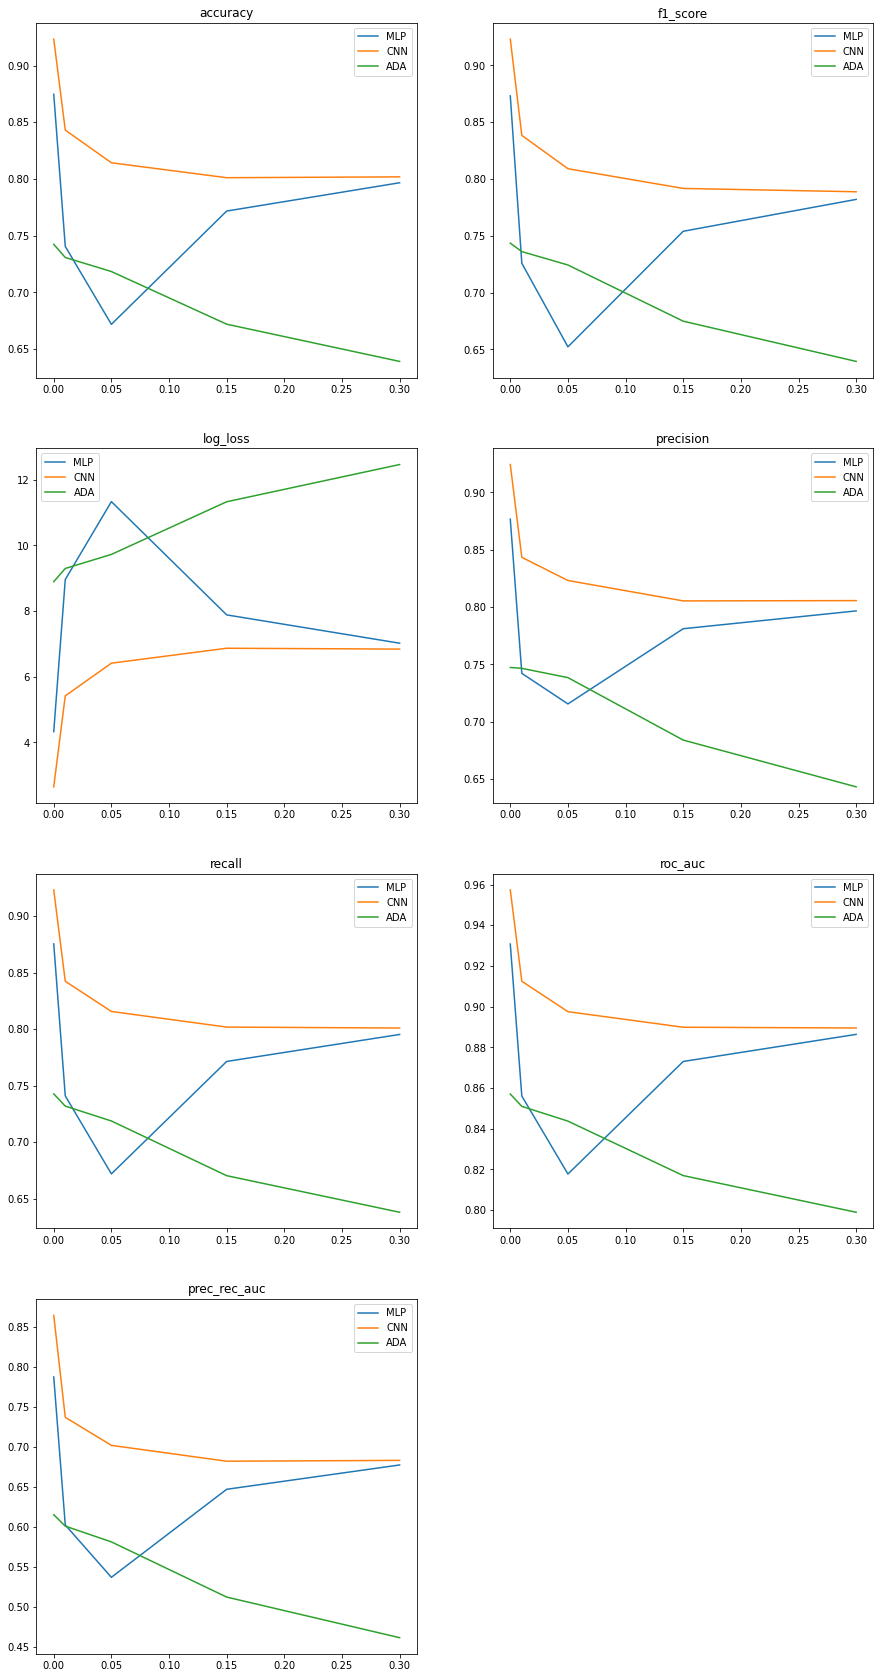

In [108]:
score_names = tests_time.columns[1:8]

ncols = 2
nrows = int(7 / ncols) + 1

fig_width = 7.5 * ncols
fig_height = 7.5 * nrows

plt.figure(figsize=(fig_width,fig_height))

counter = 1

for score in score_names:
    plt.subplot(nrows, ncols, counter)
    draw_plot(tests_time, score)
    counter = counter + 1
    
plt.savefig('4.png')